In [28]:
import os
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import warnings
warnings.filterwarnings('ignore')

In [29]:
predictions = pd.read_csv("submission_prediction_output.csv")
predictions = pd.DataFrame.from_dict(predictions)
predictions.head()

,uuid,week_number,sum_visit_counts
0,00681c7d-46b7-44e9-9b35-98331e53a204,21,34985.0
1,013b319a-9146-4623-a13d-a94db23ee41a,21,2273.0
2,015ae118-28e7-406d-b981-0bc32eb4859c,21,583.0
3,03d1a415-7627-4fa0-a02c-129a079b6e8d,21,154.0
4,04d0627e-0cb3-49eb-93dc-4707a45a3bdb,21,2255.0


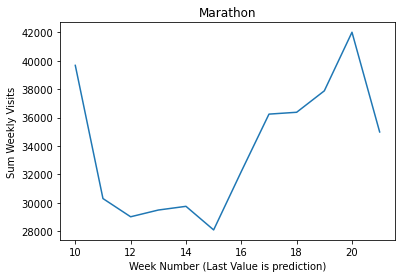

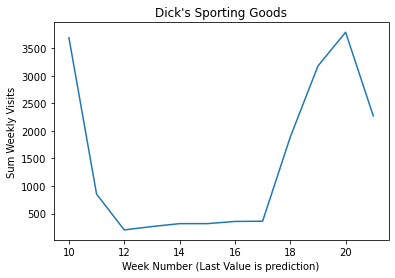

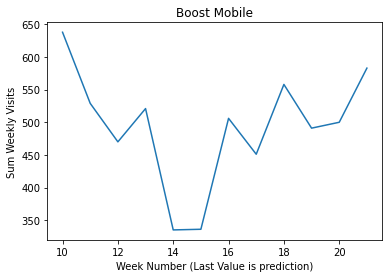

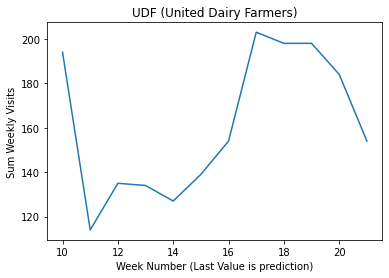

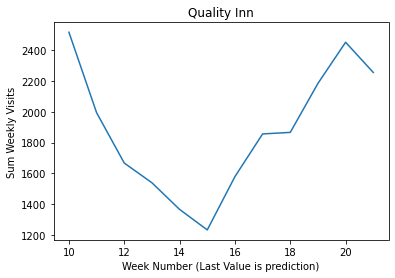

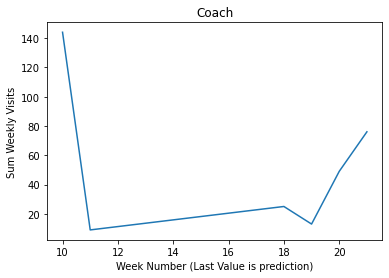

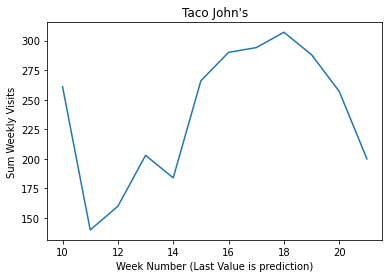

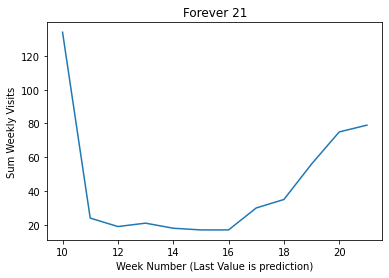

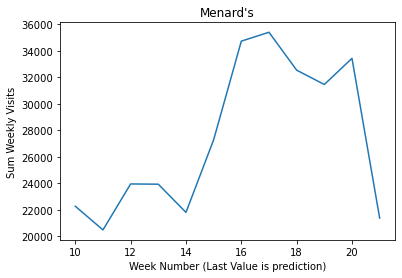

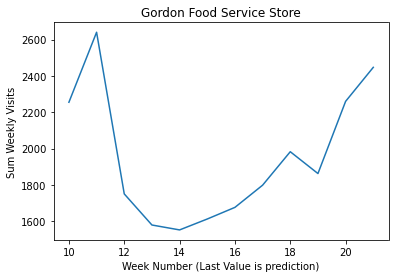

In [33]:
i = 0 #i variable is here to limit amount of plots since notebook cannont hold all 303 company charts, but will display 10 companies for visual purposes
for brand_name, data_brand in data.groupby('uuid'):
     # comment all code related to i to display all graphs for every company or change i == to display more
    if i == 10:
        break
    i = i + 1
    if len(data_brand.index) > 2:
        frame = data_brand
        uuid = data_brand['uuid'].values[0]
        brand = data_brand['brand_name'].values[0]
       # frame.drop(['week_number'], axis=1, inplace = True)
        frame.drop(['date_start'], axis=1, inplace = True)
        frame.drop(['brand_name'], axis=1, inplace = True)
        frame.drop(['top_category'], axis=1, inplace = True)
        frame.drop(['nr_POIs'], axis=1, inplace = True)
        frame.drop(['naics'], axis=1, inplace = True)
        frame.drop(['cards_per_week'], axis=1, inplace = True)
        frame.drop(['transactions_per_week'], axis=1, inplace = True)
        frame.drop(['total_spent_per_week'], axis=1, inplace = True)
        frame.drop(['avg_distance_from_home'], axis=1, inplace = True)
        frame.drop(['sd_distance_from_home'], axis=1, inplace = True)
        frame.drop(['avg_median_dwell'], axis=1, inplace = True)
        frame.drop(['sd_median_dwell'], axis=1, inplace = True)
        frame = frame.append(predictions.loc[predictions['uuid']==uuid])
        
        plt.figure()
        plt.plot(frame['week_number'],frame['sum_visit_counts'])
        plt.title(brand)
        plt.xlabel('Week Number (Last Value is prediction)')
        plt.ylabel('Sum Weekly Visits')

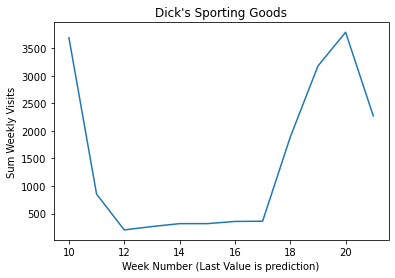

In [34]:
# Single UUid search to display one graph out of the entire data set
# just change uuid to whichever company you would like to display

frame = data[data['uuid'] == "013b319a-9146-4623-a13d-a94db23ee41a"]


if len(frame.index) > 2:
#     frame = data_brand
    uuid = frame['uuid'].values[0]
    brand = frame['brand_name'].values[0]
    frame.drop(['date_start'], axis=1, inplace = True)
    frame.drop(['brand_name'], axis=1, inplace = True)
    frame.drop(['top_category'], axis=1, inplace = True)
    frame.drop(['nr_POIs'], axis=1, inplace = True)
    frame.drop(['naics'], axis=1, inplace = True)
    frame.drop(['cards_per_week'], axis=1, inplace = True)
    frame.drop(['transactions_per_week'], axis=1, inplace = True)
    frame.drop(['total_spent_per_week'], axis=1, inplace = True)
    frame.drop(['avg_distance_from_home'], axis=1, inplace = True)
    frame.drop(['sd_distance_from_home'], axis=1, inplace = True)
    frame.drop(['avg_median_dwell'], axis=1, inplace = True)
    frame.drop(['sd_median_dwell'], axis=1, inplace = True)
    frame = frame.append(predictions.loc[predictions['uuid']==uuid])
        
    plt.figure()
    plt.plot(frame['week_number'],frame['sum_visit_counts'])
    plt.title(brand)
    plt.xlabel('Week Number (Last Value is prediction)')
    plt.ylabel('Sum Weekly Visits')
else:
    print("Invalid amount of data to make prediction")